In [1]:
import numpy as np
import pandas as pd
from pytmle import PyTMLE

In [2]:
target_times = [1.0, 2.0, 3.0, 4.0, 5.0]
np.random.seed(42)

Generate / load a mock dataset with n_samples and two events 1 and 2, in which both group partly depends on x1, x2 and x3, and event_indicator partly depends on group, x1 and x3.

In [3]:
# n_samples = 300

# data = {
#     "x1": np.random.normal(0, 1, n_samples),
#     "x2": np.random.normal(0, 1, n_samples),
#     "x3": np.random.normal(0, 1, n_samples),
# }

# # Modify group to depend on x1, x2, and x3
# prob_group = 0.5 + 0.1 * data["x1"] - 0.2 * data["x2"] + 0.05 * data["x3"]
# prob_group = np.clip(prob_group, 0, 1)
# data["group"] = np.random.binomial(1, prob_group, n_samples)

# data["event_time"] = np.round(np.random.exponential(scale=10, size=n_samples), 2)

# # Modify event_indicator to depend on group, x1, and x3
# prob_event_1 = 0.2 + 0.1 * data["group"] + 0.05 * data["x1"] - 0.05 * data["x3"]
# prob_event_2 = 0.2 + 0.05 * data["group"] - 0.025 * data["x1"] + 0.1 * data["x3"]
# prob_event_0 = 1 - prob_event_1 - prob_event_2

# # Ensure probabilities are between 0 and 1
# prob_event_1 = np.clip(prob_event_1, 0, 1)
# prob_event_2 = np.clip(prob_event_2, 0, 1)
# prob_event_0 = np.clip(prob_event_0, 0, 1)

# # Normalize probabilities
# total_prob = prob_event_0 + prob_event_1 + prob_event_2
# prob_event_0 /= total_prob
# prob_event_1 /= total_prob
# prob_event_2 /= total_prob

# data["event_indicator"] = np.array([
#     np.random.choice([0, 1, 2], p=[prob_event_0[i], prob_event_1[i], prob_event_2[i]])
#     for i in range(n_samples)
# ])

# df = pd.DataFrame(data)

# df.to_csv("data.csv")

In [4]:
df = pd.read_csv("data.csv", index_col=0)

Instantiate the PyTMLE class according to the given dataset.

In [5]:
tmle = PyTMLE(df, 
              col_event_times="event_time", 
              col_event_indicator="event_indicator", 
              col_group="group", 
              target_times=target_times, 
              target_events=[1,2],
              g_comp=True)

Fit PyTMLE with the default models for initial estimates, using 5 CV folds and up to 100 TMLE updates.

In [6]:
tmle.fit(cv_folds=5, max_updates=100, save_models=True)

INFO:pytmle.pytmle:Estimating propensity scores...
INFO:pytmle.pytmle:Estimating hazards and event-free survival...
INFO:pytmle.pytmle:Estimating censoring survival...
INFO:pytmle.pytmle:Starting TMLE update loop...
INFO:pytmle.tmle_update:TMLE converged at step 39.


Plot the estimated CIF for both events. The 'x' markers show the effects that G-computation would yield without the TMLE update.

(<Figure size 1400x700 with 2 Axes>,
 array([<Axes: title={'center': 'Event 1'}, xlabel='Time', ylabel='Predicted Risk'>,
        <Axes: title={'center': 'Event 2'}, xlabel='Time', ylabel='Predicted Risk'>],
       dtype=object))

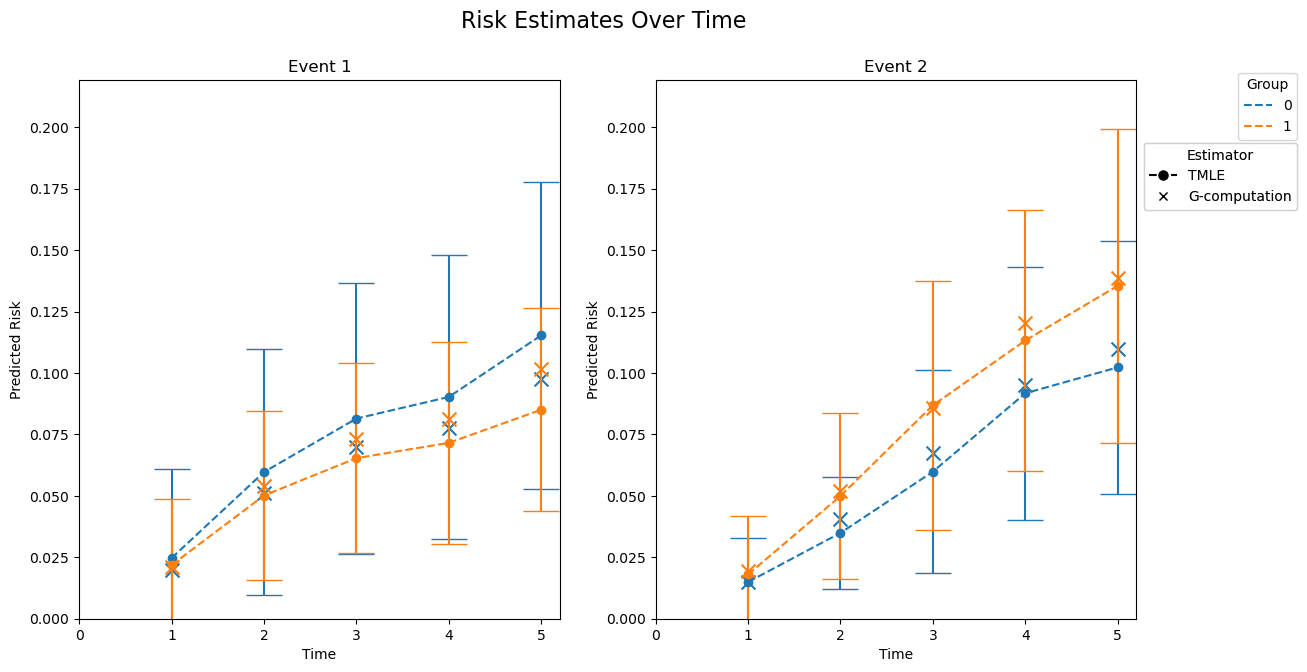

In [7]:
tmle.plot(g_comp=True)

Plot the ATE estimates in terms of ratios. You can alternatively use `type="diff"` to use differences instead.

(<Figure size 1400x700 with 2 Axes>,
 array([<Axes: title={'center': 'Event 1'}, xlabel='Time', ylabel='ATE (Ratio)'>,
        <Axes: title={'center': 'Event 2'}, xlabel='Time', ylabel='ATE (Ratio)'>],
       dtype=object))

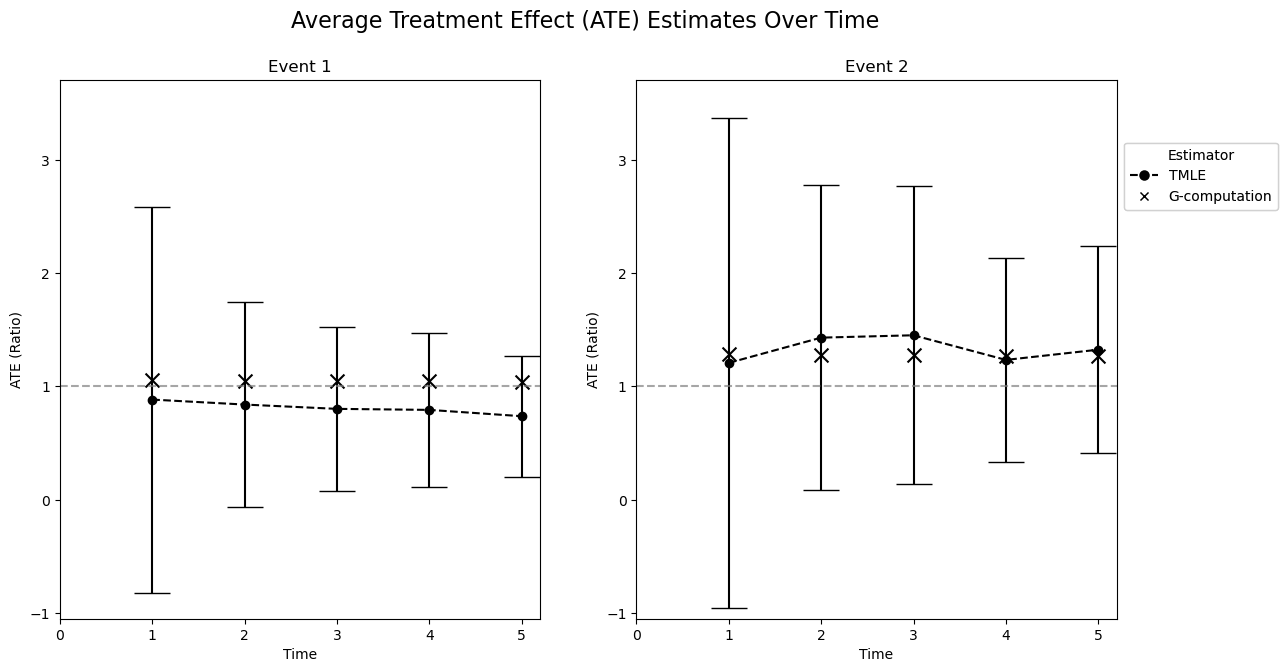

In [8]:
tmle.plot(g_comp=True, type="ratio")

Plot $||PnEIC||$ over TMLE iterations to check that it was minimized effectively.

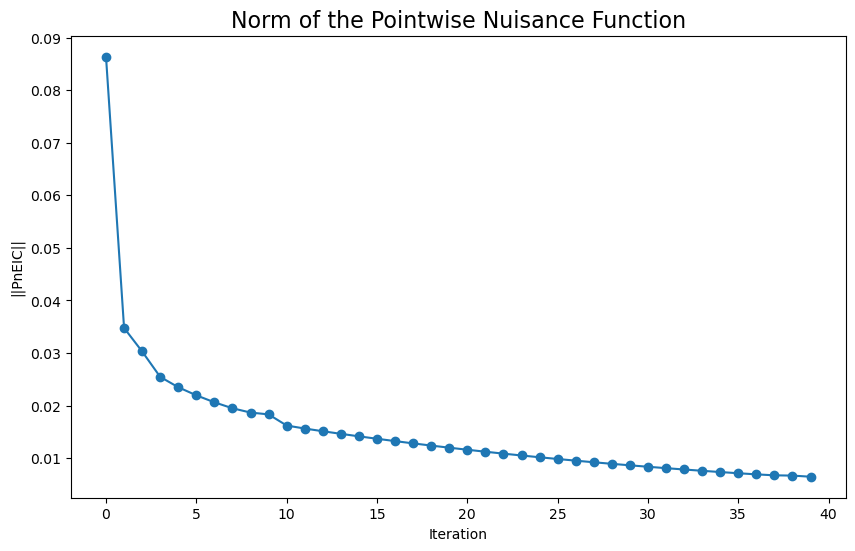

In [9]:
tmle.plot_norm_pn_eic()

Plot the nuisance weights at baseline to check that positivity is not an issue. Set `only_baseline=False` to also get plots for the target times.

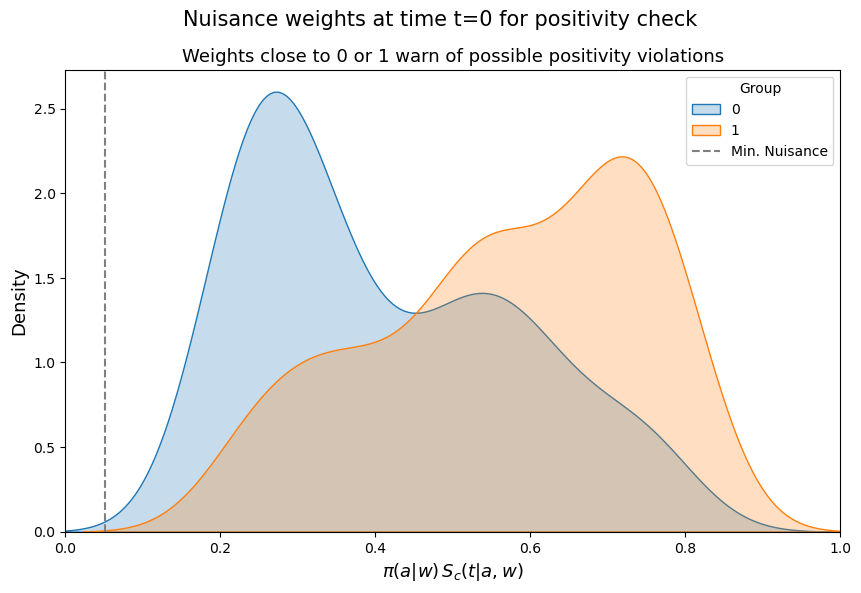

In [10]:
tmle.plot_nuisance_weights(only_baseline=True)

Since `save_models` was set to `True` in the `fit()` call, you can extract the models used for initial estimates and analyze them further.

In [11]:
tmle.models

{'propensity_model': StackingClassifier(cv=5,
                    estimators=[('rf', RandomForestClassifier()),
                                ('gb', GradientBoostingClassifier())],
                    final_estimator=LogisticRegression(max_iter=1000)),
 'event_1_model': CoxPHSurvivalAnalysis(),
 'event_2_model': CoxPHSurvivalAnalysis(),
 'censoring_model': CoxPHSurvivalAnalysis()}